In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
st_df = pd.read_csv('space_titanic.csv')

st_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [4]:
st_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
st_df.columns = [column.lower() for column in st_df.columns]
st_df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
st_df = st_df.dropna()

In [8]:
st_df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
st_df['cabin'].value_counts()

G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: cabin, Length: 5305, dtype: int64

In [10]:
cols_to_drop = ['passengerid', 'cabin', 'name']
st_df.drop(columns = cols_to_drop, inplace = True)

In [11]:
dummies = pd.get_dummies(st_df[['homeplanet', 'destination']], drop_first = True)

In [12]:
st_df = pd.concat([st_df, dummies], axis = 1)

In [13]:
pd.concat([st_df, dummies], axis = 1)

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1,1,0,0,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1,0,0,0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1,1,0,0,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1,1,0,0,1
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,0,1,0,0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0,0,0,1,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,0,1,0,0,0,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,0,1,0,0,0


In [14]:
st_df.drop(columns= [ 'homeplanet', 'destination'], inplace = True)
st_df.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [15]:
st_df['transported'] = np.where(st_df['transported'] == True, 'True', 'False')

In [16]:
st_df.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


In [17]:
train, val, test = train_val_test(st_df, 'transported')
train.shape, val.shape, test.shape

((4624, 13), (991, 13), (991, 13))

In [18]:
#need to have separate data frames where one excludes target variable
x_train = train.drop(columns = ['transported'])
y_train = train['transported']

x_val = val.drop(columns = ['transported'])
y_val = val['transported']

x_test = test.drop(columns = ['transported'])
y_test = test['transported']

In [19]:
seed = 42
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [20]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
clf.score(x_train, y_train)

0.7571366782006921

In [22]:
clf

DecisionTreeClassifier(max_depth=3, random_state=42)

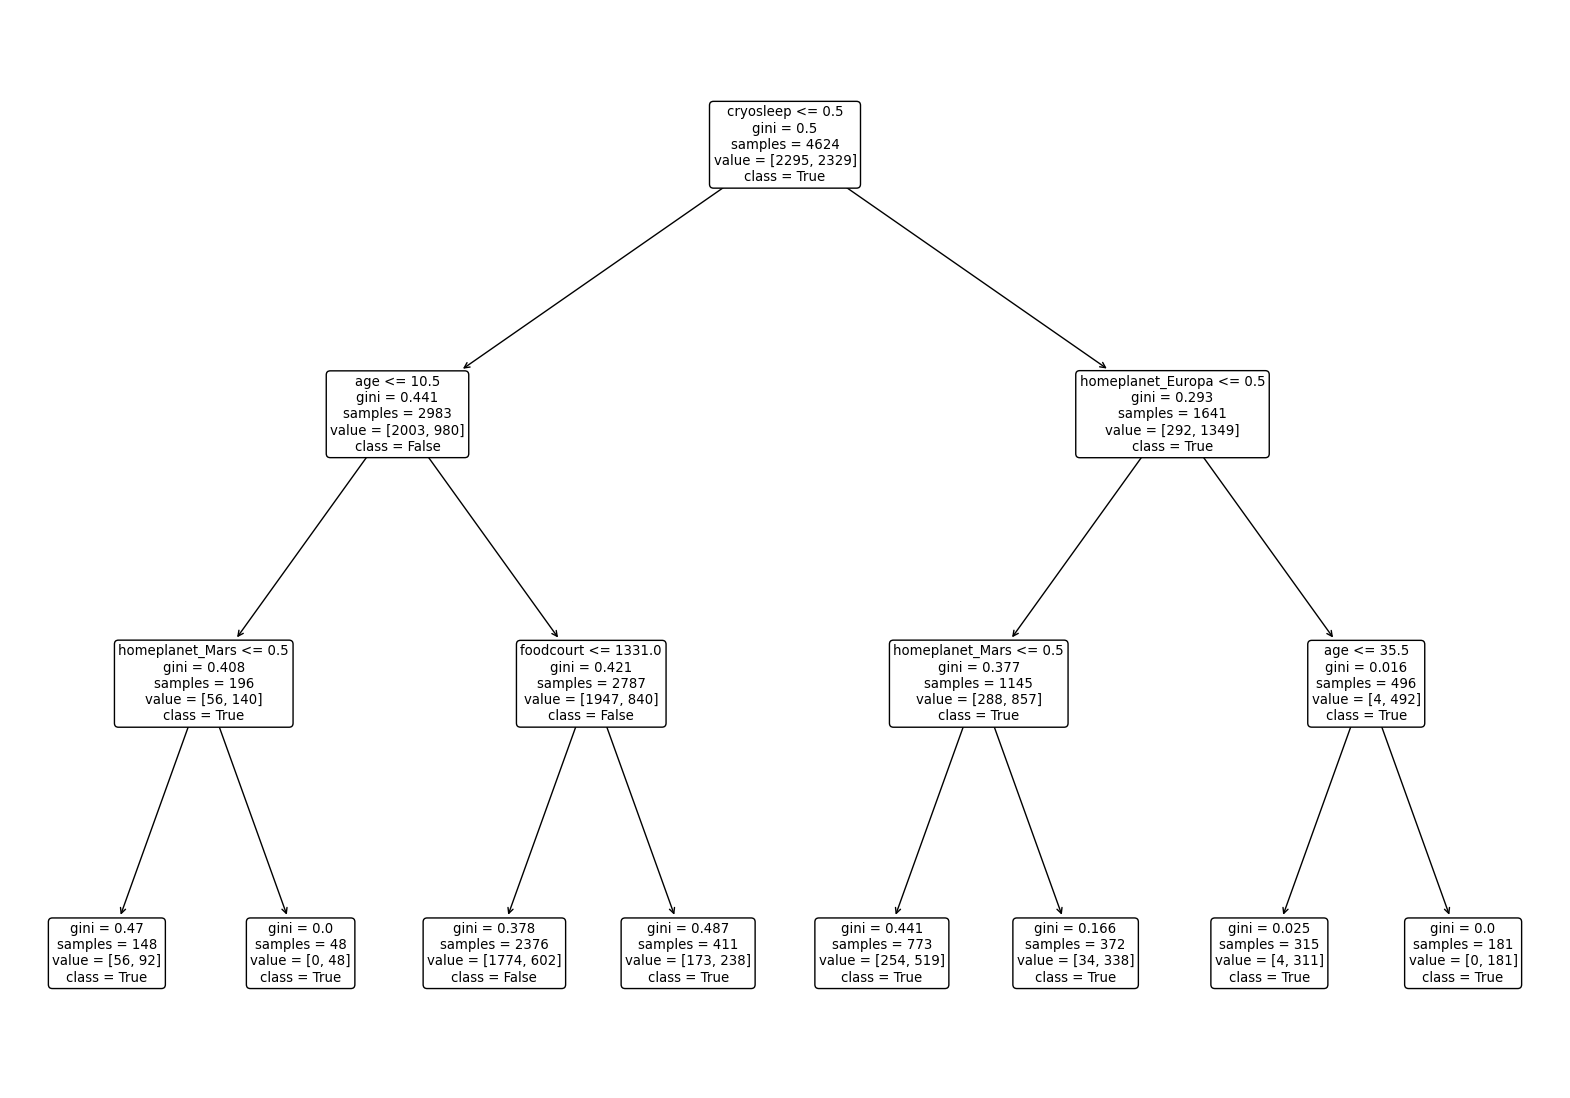

In [23]:
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names= x_train.columns, class_names = clf.classes_, rounded = True)
plt.show()

In [24]:
val_preds = clf.predict(x_val)

In [25]:
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

       False       0.72      0.77      0.74       492
        True       0.76      0.71      0.73       499

    accuracy                           0.74       991
   macro avg       0.74      0.74      0.74       991
weighted avg       0.74      0.74      0.74       991



In [26]:
big_clf = DecisionTreeClassifier(max_depth = 10, random_state = 42)

In [27]:
big_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [28]:
big_clf.score(x_train, y_train)
#make actual on x_train vs predictions of y_train and returns the accuracy

0.8451557093425606

In [29]:
big_clf.score(x_val, y_val)

0.751765893037336